In [1]:
import numpy as np
from matplotlib import pyplot as plt
import functools
from ferrari.depressed_cardan import cardan_depressed

In [2]:
# def non_linear(x):
#     y = x**3
#     return y

# def inverse_non_linear(y):
#     x = np.sign(y)*np.exp(1/3*np.log(np.abs(y)))
#     return x
    

In [3]:
def non_linear(x, g):
    y = x**3 + g*x
    return y

def inverse_non_linear(y,g):
    x = cardan_depressed(g,-y)
    return x

In [4]:
g = 2
x = np.random.rand(10)
y = non_linear(x, g)
x_r = inverse_non_linear(y,g)

x_r-x

array([ 0.00000000e+00,  0.00000000e+00,  2.22044605e-16, -1.11022302e-16,
        1.11022302e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [12]:
def normalization(x, min, max):
    y = (x - min)*2/(max-min)-1
    return y

def forward_layer(x,a,b,g):
    z = x*a + b
    y = non_linear(z,g) 
    return y


def normalized_forward_layer(x,a,b,c,d,g):
    x = forward_layer(x,a,b,g)
    x = x*c+d
    return x



def forward_function(x,a,b,c,d,g,n_layers):
    for i in range(n_layers):   
        x = normalized_forward_layer(x,a[i],b[i],c[i],d[i],g[i])
    return x



def backward_function(y,a,b,c,d,g,n_layers):
    for i in range(n_layers):
        y = (y-d[n_layers-i-1])/c[n_layers-i-1]
        y = inverse_non_linear(y,g[n_layers-i-1])
        y = (y-b[n_layers-i-1])/a[n_layers-i-1]
    return y


# def normalization(f,x):
#     max = f(1)
#     min = f(0)
#     y = (f(x) - min)/(max-min)
#     return y

In [70]:
n_layers = 20

# a = np.random.rand(n_layers)*2
a = np.exp(np.random.randn(n_layers)*2)

b = a* np.random.rand(n_layers)*2-1
g = np.exp(np.random.randn(n_layers)*2)
max = forward_layer(1,a,b,g)
min = forward_layer(-1,a,b,g)
c = 2/(max-min)
d = -min*c-1



In [71]:
forward = functools.partial(forward_function,a=a,b=b,c=c,d=d,g=g,n_layers=n_layers)
backward = functools.partial(backward_function,a=a,b=b,c=c,d=d,g=g,n_layers=n_layers)


In [72]:
x = np.linspace(-1,1,1000+1)
y = forward(x)

gradient = np.gradient(y, x)
x_reverse = backward(y)
err = np.max(np.abs(x-x_reverse))
print(err)

1.0028273340623173e-06


/home/wenqingxie/Code/Normalizing-FLow/ferrari/Ferrari_numpy.py:79: RuntimeWarning: divide by zero encountered in log
  y = np.sign(x)*np.exp(index*np.log(np.abs(x)))


/tmp/ipykernel_28376/2101377656.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


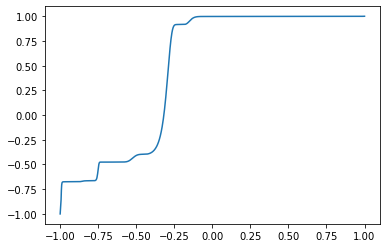

In [73]:
fig,ax = plt.subplots()
ax.plot(x,y)
fig.show()

/tmp/ipykernel_28376/999524737.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


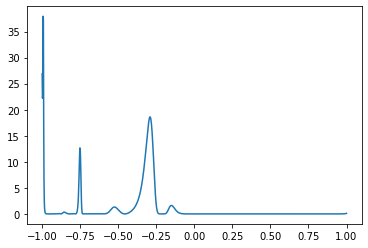

In [74]:
fig,ax = plt.subplots()
ax.plot(x,gradient)
fig.show()